## Microsoft Project Blockbuster

* Student name: Brendan M. Whittington 
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Claude Fried 
* Blog post URL: https://medium.com/@brendanwhittington/big-what-98f796500111

## Overview

Microsoft has engaged us to assess a foray into the movie business. We will be looking at production budget and box office gross correlations, seasonality of box office grosses and the popularity of 3-D movies. We utilized data/information from movie industry aggregators IMDB and The Numbers. We are trying to assess the type of movies Microsoft should consider making. We are utilizing data from movie industry data/information aggregators IMDB, The Numbers and BoxOfficeMojo.

We found a healthy correlation between production budget and worldwide box office gross, that July and October are the best and worst months for the median movie release, respectively, and movies that have 3-D as an option receive marginally higher audience reviews. On the basis of these findings Microsoft should focus on blockbuster type movies focusing on a summer release with an option of 3-D viewing. 

## Business Problem

Microsoft needs to understand the type of investments it will need to make in order to make successful movies. One aspect to understand is whether larger production budgets also result in higher returns on investment and the correlation between the two. Making a good movie, however, is also not enough as timing is critical. Knowing what time of the year successful movies are released is also critical. Finally, there has been a significant increase in recent years around releasing 3-D movies due to the potential of selling premium-priced tickets. However, it is unclear whether or not people actually rate such movies higher versus those only in traditional formats.

## Data Understanding

The data being used in this analysis comes from IMDB and The Numbers; two leading aggregators of information on the movie industry. The IMDB data sets include general descriptive information on over 100,000 movie entries including genre, run time, user ratings and title information. From this data we will be looking to isolate those movies that had 3-D releases and compare their user score versus movies without a 3-D release. The Numbers data set includes release date, production cost and box office grosses for almost 6000 movies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Set 1: Films by Year, Runtime and Genre

This data set includes thousands of movies released since 2010 with information regarding their runtime and genre. It includes a helpful "tconst" column which serves as a unique identifier. The "start_year" is presumably the release year, however, includes some future releases for which there will be no box office data. The runtime_minutes contains some films missing this info designated with NaN or "strange" times either really short (1 - 2 minutes or extremely long). The genres are across many different categories and some films have multiple categories or are missing.

In [2]:
df_imdb_title_basic = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_imdb_title_basic = df_imdb_title_basic

In [3]:
df_imdb_title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
df_imdb_title_basic['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [5]:
df_imdb_title_basic['runtime_minutes'].value_counts()

90.0     7131
80.0     3526
85.0     2915
100.0    2662
95.0     2549
         ... 
382.0       1
724.0       1
808.0       1
287.0       1
540.0       1
Name: runtime_minutes, Length: 367, dtype: int64

In [6]:
df_imdb_title_basic['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Comedy,History,Mystery            1
Biography,Music,Musical           1
Drama,War,Western                 1
Comedy,Musical,Sport              1
Action,Documentary,Western        1
Name: genres, Length: 1085, dtype: int64

### Data Set 2: Films by IMDB Rating

This data set contains the IMDB ratings for thousands of movies as identified by their tconst value. All rows for each column contain numerical info.

In [7]:
df_imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
df_imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### Data Set 3: Films by Production Budget and Box Office Gross by The Numbers

Production costs and box office from the Numbers. Unclear over what time frame as data currently not in a numerical format. Will require cleaning.

In [9]:
df_tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [10]:
df_tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Data Set 4: Alternate Movie Titles by IMDB (3-D Movies)

The goal here will be to isolate the movies that were also released in 3-D movies.

In [11]:
df_imdb_titles_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
df_imdb_titles_akas

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [12]:
test = df_imdb_titles_akas.copy()

test[
    df_imdb_titles_akas[
    'attributes'] == '3-D version'].drop_duplicates(subset='title_id')

,title_id,ordering,title,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0
75,tt0401729,34,John Carter: Entre dos mundos,UY,NaN,NaN,3-D version,0.0
1494,tt1869504,3,Jillian's Travels: Africa in 3D,US,NaN,NaN,3-D version,0.0
2586,tt2215719,10,Katy Perry: Part of Me 3D,US,NaN,NaN,3-D version,0.0
2729,tt0816711,37,Guerra mundial Z,UY,NaN,NaN,3-D version,0.0
...,...,...,...,...,...,...,...,...
319390,tt5007458,3,The Royal Adelaide Show 3D,AU,NaN,NaN,3-D version,0.0
326985,tt4410000,10,Luis y sus amigos del espacio,UY,NaN,NaN,3-D version,0.0
329396,tt3829266,16,The Predator 3D,FI,NaN,NaN,3-D version,0.0
330014,tt4633694,32,Spider-Man: Un nuevo universo,UY,NaN,NaN,3-D version,0.0


## Data Preperation

### Cleaning Dataset 1

Removing original_title and start_year columns due to lack of use. Remove any genres that are NaN. There also appear to be some odd movie lengths. We will keep movies to include only those 60 mins in length long but no longer than 300 mins. 

In [13]:
df_imdb_title_basic = df_imdb_title_basic.drop(
    ['original_title', 'start_year'], axis =1)

df_imdb_title_basic.dropna(inplace=True)

df_imdb_title_basic = df_imdb_title_basic[(
    df_imdb_title_basic['runtime_minutes'] >= 60) & 
    (df_imdb_title_basic['runtime_minutes'] <= 300)]

df_imdb_title_basic

,tconst,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,75.0,Comedy
...,...,...,...,...
146133,tt9916132,The Mystery of a Buryat Lama,94.0,"Biography,Documentary,History"
146134,tt9916160,Drømmeland,72.0,Documentary
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,84.0,Documentary
146137,tt9916190,Safeguard,90.0,"Drama,Thriller"


We will remove any movie that has "Documentary" as a descriptor as we want to only focus on movies. After that we will only select the first genre and remap that as the movies genre. The assumption is that the first categorization is likely to most apt description of the movie genre and we will use this to remove any other "non-movie" genres.

In [14]:
df_imdb_title_basic['genres'] = (
    df_imdb_title_basic['genres']
    .map(lambda x: 'Documentary' if 'Documentary' in x else x)
)

df_imdb_title_basic

,tconst,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,75.0,Comedy
...,...,...,...,...
146133,tt9916132,The Mystery of a Buryat Lama,94.0,Documentary
146134,tt9916160,Drømmeland,72.0,Documentary
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,84.0,Documentary
146137,tt9916190,Safeguard,90.0,"Drama,Thriller"


Based on the below the following row categories will be removed to only include "movies": Documentary, Music, Reality-TV, Talk-Show, News, Adult, Game-Show 

In [15]:
df_imdb_title_basic['genres'] = df_imdb_title_basic[
    'genres'].map(lambda x: str(x).split(',')[0])

df_imdb_title_basic

,tconst,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,Action
1,tt0066787,One Day Before the Rainy Season,114.0,Biography
2,tt0069049,The Other Side of the Wind,122.0,Drama
4,tt0100275,The Wandering Soap Opera,80.0,Comedy
5,tt0111414,A Thin Life,75.0,Comedy
...,...,...,...,...
146133,tt9916132,The Mystery of a Buryat Lama,94.0,Documentary
146134,tt9916160,Drømmeland,72.0,Documentary
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,84.0,Documentary
146137,tt9916190,Safeguard,90.0,Drama


In [16]:
df_imdb_title_basic['genres'].value_counts()

Documentary    28330
Drama          23299
Comedy         16005
Action          7285
Horror          4690
Crime           2800
Adventure       2456
Thriller        1831
Biography       1278
Animation        989
Romance          864
Family           727
Mystery          613
Fantasy          591
Sci-Fi           475
Music            355
Musical          236
History          206
Sport            138
Western           96
War               57
Reality-TV        21
Talk-Show         10
News               7
Adult              5
Game-Show          1
Name: genres, dtype: int64

In [17]:
notmovies = {
    'Documentary',
    'Music', 
    'Reality-TV', 
    'News', 
    'Adult', 
    'Game-Show', 
    'Talk-Show'
}

df_imdb_title_basic = df_imdb_title_basic[
    ~df_imdb_title_basic['genres'].isin(notmovies)]

df_imdb_title_basic

,tconst,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,Action
1,tt0066787,One Day Before the Rainy Season,114.0,Biography
2,tt0069049,The Other Side of the Wind,122.0,Drama
4,tt0100275,The Wandering Soap Opera,80.0,Comedy
5,tt0111414,A Thin Life,75.0,Comedy
...,...,...,...,...
146122,tt9914286,Sokagin Çocuklari,98.0,Drama
146128,tt9914828,The War of Godzilla,102.0,Action
146132,tt9915872,The Last White Witch,97.0,Comedy
146137,tt9916190,Safeguard,90.0,Drama


### Cleaning Dataset 2

The data set contains a large number of movies with under 1000 reviews. The "outliers" with 1 million plus reviews are actually the real movies (ex Avatar, Avengers etc) that people are watching whereas "movies" with few reviews are more actually news broadcasts, music videos, documentaries etc. Movies with only a few reviews are more likely to have skewed reviews as they have niche appeal or have fake reviews. So we will only keep movies with at least 1000 reviews.

In [18]:
df_imdb_title_ratings = df_imdb_title_ratings[
    df_imdb_title_ratings['numvotes'] > 1000]

df_imdb_title_ratings

,tconst,averagerating,numvotes
3,tt1043726,4.2,50352
6,tt1094666,7.0,1613
10,tt1171222,5.1,8296
11,tt1174693,5.8,2381
12,tt1181840,7.0,5494
...,...,...,...
73763,tt8443704,7.5,1947
73771,tt8564902,4.7,5863
73772,tt8574252,7.1,1526
73792,tt8948790,9.0,1778


### Cleaning Dataset 3

Need to convert production_budget, domestic_gross, and worldwide_gross into integers from strings. Creating new columns for year and month. The former will be to filter out films prior to 2000 as the production and gross numbers will be less comparable to more recent movies. The month information will be used for the seasonality analysis. We will also remove "mom and pop" films by removing those with budgets under $1 million. Movies without a worldwide_gross amount will be removed.

In [19]:
#Convert strings into integers
df_tn_movie_budgets['production_budget'] = (
    df_tn_movie_budgets['production_budget']
    .map(lambda x: int(x[1:].replace(',',""))))

df_tn_movie_budgets['domestic_gross'] = df_tn_movie_budgets[
    'domestic_gross'].map(lambda x: int(x[1:].replace(',',"")))

df_tn_movie_budgets['worldwide_gross'] = df_tn_movie_budgets[
    'worldwide_gross'].map(lambda x: int(x[1:].replace(',',"")))

def month_conv(x):
    month = {'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
    }
    
    return month.get(x)


df_tn_movie_budgets['year'] = df_tn_movie_budgets[
    'release_date'].map(lambda x: int(x[-4:]))

df_tn_movie_budgets['month'] = df_tn_movie_budgets[
    'release_date'].map(lambda x: month_conv(x[:3]))

df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018,12
5778,79,"Apr 2, 1999",Following,6000,48482,240495,1999,4
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005,7
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,2015,9


In [20]:
df_tn_movie_budgets = df_tn_movie_budgets.loc[
    (df_tn_movie_budgets['year'] >= 2000) & 
    (df_tn_movie_budgets['worldwide_gross'] > 0) &
    (df_tn_movie_budgets['production_budget'] > 1000000)
]

df_tn_movie_budgets.loc['production_budget'] = df_tn_movie_budgets[
    'production_budget'].map(lambda x: x/1000000)

df_tn_movie_budgets.loc['domestic_gross'] = df_tn_movie_budgets[
    'domestic_gross'].map(lambda x: x/1000000)

df_tn_movie_budgets.loc['worldwide_gross'] = df_tn_movie_budgets[
    'worldwide_gross'].map(lambda x: x/1000000)

df_tn_movie_budgets

C:\Users\brend\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1.0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009.0,12.0
1,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011.0,5.0
2,3.0,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019.0,6.0
3,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015.0,5.0
4,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017.0,12.0
...,...,...,...,...,...,...,...,...
5202,3.0,"Mar 7, 2017",Departure,1100000.0,0.0,2.756100e+04,2017.0,3.0
5208,9.0,"Dec 11, 2009",Rocket Singh: Salesman of the Year,1070000.0,164649.0,5.348767e+06,2009.0,12.0
production_budget,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domestic_gross,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning Dataset 4

Extract movie identifiers with 3-D releases. Drop unneeded columns

In [21]:
df_imdb_3d = df_imdb_titles_akas.copy()

df_imdb_3d = df_imdb_3d[df_imdb_3d[
    'attributes'] == '3-D version'].drop_duplicates(subset='title_id')

df_imdb_3d = df_imdb_3d.drop(
    ['ordering', 'region', 'language', 'title', 'types', 'attributes', 'is_original_title'], 
    axis=1)

df_imdb_3d['has_3d'] = 1

df_imdb_3d.rename(columns={'title_id':'tconst'}, 
                  inplace=True)

df_imdb_3d

,tconst,has_3d
12,tt0369610,1
75,tt0401729,1
1494,tt1869504,1
2586,tt2215719,1
2729,tt0816711,1
...,...,...
319390,tt5007458,1
326985,tt4410000,1
329396,tt3829266,1
330014,tt4633694,1


### Merging Dataset 1, 2, and 4

In [22]:
combined_imdb = df_imdb_title_basic.merge(df_imdb_title_ratings, on='tconst', 
                                          how='inner')

combined_imdb = combined_imdb.merge(df_imdb_3d,
                                    on='tconst', 
                                    how='left')

combined_imdb.head(50)

,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,has_3d
0,tt0069049,The Other Side of the Wind,122.0,Drama,6.9,4517,NaN
1,tt0249516,Foodfight!,91.0,Action,1.9,8248,NaN
2,tt0293069,Dark Blood,86.0,Thriller,6.6,1053,NaN
3,tt0315642,Wazir,103.0,Action,7.1,15378,NaN
4,tt0323808,The Wicker Tree,96.0,Drama,3.9,2328,NaN
5,tt0326965,In My Sleep,104.0,Drama,5.5,1889,NaN
6,tt0337692,On the Road,124.0,Adventure,6.1,37886,NaN
7,tt0339736,The Evil Within,98.0,Horror,5.6,2420,NaN
8,tt0359950,The Secret Life of Walter Mitty,114.0,Adventure,7.3,275300,NaN
9,tt0360556,Fahrenheit 451,100.0,Drama,4.9,14469,NaN


## Data Modeling

### Question 1: Budget vs. Gross Correlation

In [23]:
df_budget_gross = df_tn_movie_budgets.drop(['id','year','month'], 
                                           axis=1)

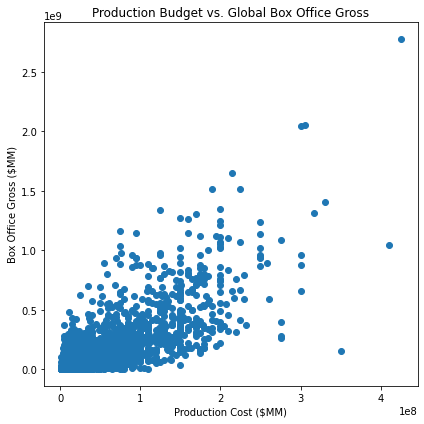

In [24]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(x=df_budget_gross['production_budget'], 
           y=df_budget_gross['worldwide_gross'])

ax.set(title="Production Budget vs. Global Box Office Gross", 
       xlabel='Production Cost ($MM)', 
       ylabel='Box Office Gross ($MM)')

fig.tight_layout()

In [25]:
df_budget_gross.corr()

,production_budget,domestic_gross,worldwide_gross
production_budget,1.000000,0.716603,0.771165
domestic_gross,0.716603,1.000000,0.939673
worldwide_gross,0.771165,0.939673,1.000000


### Question 2: Box Office Gross Seasonality

In [26]:
monthly_gross = df_tn_movie_budgets.groupby('month').median()
monthly_gross.reset_index(inplace=True)

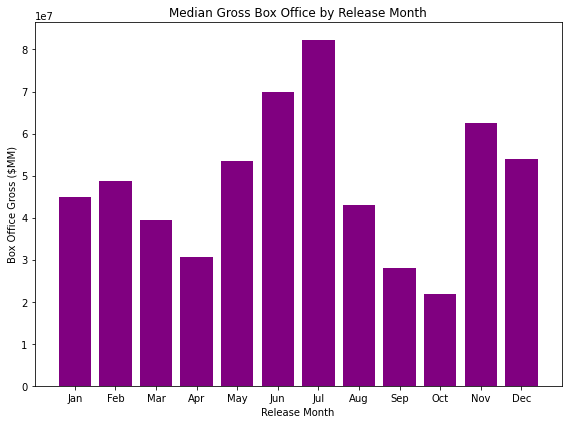

In [27]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(x=monthly_gross['month'], 
       height=monthly_gross['worldwide_gross'], 
       color='purple')

ax.set(title="Median Gross Box Office by Release Month", 
       xlabel='Release Month', 
       ylabel='Box Office Gross ($MM)')

ax.set_xticks([
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12]
)
    
ax.set_xticklabels([
    'Jan',
    'Feb',
    'Mar',
    'Apr',
    'May',
    'Jun',
    'Jul',
    'Aug',
    'Sep',
    'Oct',
    'Nov',
    'Dec']
)

fig.tight_layout()

### Question 3: 3D Movie User Reviews

mean      6.516585
median    6.600000
std       1.003776
Name: averagerating, dtype: float64


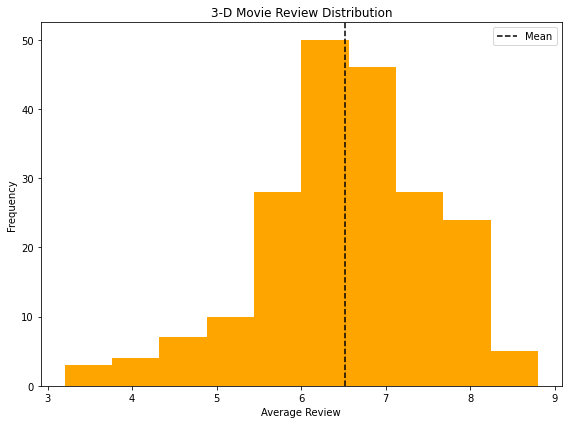

In [28]:
df_3d = combined_imdb[combined_imdb['has_3d'] == 1]['averagerating']
print(df_3d.apply(['mean', 'median', 'std']))

fig, ax = plt.subplots(figsize=(8,6))

ax.hist(df_3d, color='orange')

ax.set(title="3-D Movie Review Distribution", 
       xlabel='Average Review', 
       ylabel='Frequency')

ax.axvline(df_3d.mean(), 
            color='black', 
            linestyle='dashed', label='Mean')
ax.legend()

fig.tight_layout()

mean      6.154498
median    6.300000
std       1.138614
Name: averagerating, dtype: float64


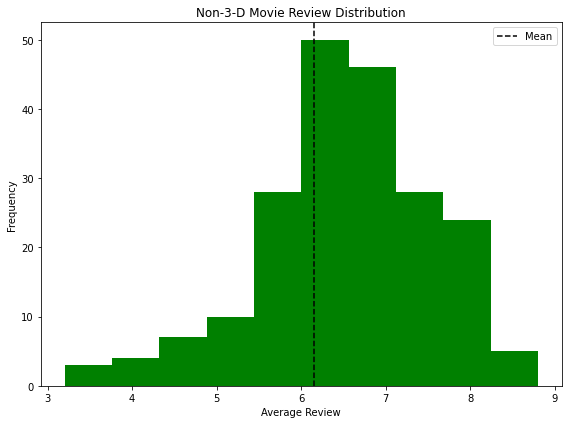

In [29]:
df_no_3d = combined_imdb[combined_imdb['has_3d'].isnull()]['averagerating']
print(df_no_3d.apply(['mean', 'median', 'std']))

fig, ax = plt.subplots(figsize=(8,6))

ax.hist(df_3d, color='green')

ax.set(title="Non-3-D Movie Review Distribution", 
       xlabel='Average Review', 
       ylabel='Frequency')

ax.axvline(df_no_3d.mean(), 
            color='black', 
            linestyle='dashed', label='Mean')
ax.legend()

fig.tight_layout()

## Evaluation

### Question 1: Strong correlation between production budgets and box office gross
With a correlation of 0.77 there appears to be a strong correlation between the size of the production budget and the total box office gross. This would suggest that Microsoft should indeed focus on larger scale budget movies. However, simply throwing a lot of money at a movie without any thought is unlikely to result in a movie people will watch. Therefore, while it is interesting to see that "bigger is better" there is clearly a multi-factoral aspect to to what makes a financially successful movie.

### Question 2: There is strong seasonality when movies are released
July is by far the biggest month of the year for the median movie release whereas October is a "graveyard". November is also quite an attractive month. This data suggests that timing of a movie release is important. Due to seasonal factors a movie may receive an innate boost when it is released regardless of its underlying quality. However, these time periods are also likely to have the most movies released and the competition may actually be more challenging.

### Question 3: Movies with 3-D options score marginally higher on viewer reviews
On a zero to ten rating scale the average review for a movie that was also released in 3-D had a 6.5 score whereas as regular films scored 6.2. Their median differences are also similar. This suggests that 3-D movies may have greater appeal, however, it is not an overwhelming amount. Based on the relatively small sample size of movies that had 3-D options (a little over 200) and those that did not (almost 4000) there is more research needed to see if the difference is material.

## Conclusion
We have determined that a foray into the movie business by Microsoft cannot be a casual business decision. Movies with larger budgets due tend to make more money than smaller ones which elevates the risk of making the movie in the first place. Movies show strong seasonality and the time of the release should not be made at random. Finally, it appears there is marginally higher appeal toward 3-D movies and to the extent it can translate into a higher box office gross is a medium worth further exploring.

Further analysis is, however, needed. The following are three follow up requirements for each of the initial research points posited.

1.) How does including the marketing budget in addition to the production cost translate into returns on investments for a movie? While this analysis only focused on production budgets which were found to be positively correlated do the returns continue to hold true if factoring the costs of marketing as well?

2.) What are the returns on investments by month of release? While there appears to be strong seasonality in favor of summers and winter releases are the actual returns on investment better or can movies being released in less popular months actually make higher returns due to reduced competition?

3.) Do 3-D movies actually result in higher audience appeal when comparing the same movie? Do people actually rate the same movie higher if there is a 3-D option or is it possible that 3-D movies are only a fad?